#### Student name: Ian Macharia
#### Student pace: full time
#### Scheduled project review date/time: Wednesday,24th May, 2023
#### Instructor name: Nikita Njoroge
#### Blog post URL:

## Business Understanding

### Overview of the Project and its Goals:

The goal of this project is to develop a credit card default prediction model using a given dataset. The dataset contains information about credit card clients, including their demographics, credit history, bill statements, and payment records. By analyzing this data, we aim to build a predictive model that can accurately predict whether a credit card client will default on their payment or not.

### Problem Statement and Importance of Credit Card Default Prediction:

The problem statement revolves around predicting credit card default, which refers to the failure of a borrower to make timely payments on their credit card. Credit card default prediction is crucial for financial institutions, such as banks and credit card companies, as it helps them assess the creditworthiness and risk profile of their clients. By accurately predicting credit card default, financial institutions can take proactive measures to mitigate potential risks and make informed decisions regarding credit approvals, setting credit limits, and debt collection strategies.

## Data Understanding

### Importing relevant packages
The packages we use are the built upon base Python language. They include: Numpy Package for mathematical analysis if we will need Pandas package - which will be used for cleaning and subsetting the data into dataframe Matplotlib package for some basic visualization Seaborn package for more detailed visualizations and clearer visualizations. It is common practice to import the packages using their aliases rather than having to call their full names.
For modelling and prediction we will employ the use of Scikit-Learn that contains several packages for performing regression analysis as well as classification.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from myfunctions import read_data, clean_data, ClassificationEvaluator

# Reading dataset
The data is provided by:
Yeh,I-Cheng. (2016). default of credit card clients. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.

The data attributes are as follows:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

> X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

> X2: Gender (1 = male; 2 = female).

> X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

> X4: Marital status (1 = married; 2 = single; 3 = others).

> X5: Age (year).

> X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    >> `X6` = the repayment status in September, 2005; `X7` = the repayment status in August, 2005; . . .;`X11` = the repayment status in April, 2005. 
    
   >> The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

> X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

> X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [2]:
data = read_data()
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
# Summary of the dataset
# Getting the shape of the dataset
print("The shape of the data is:", data.shape)
print()
# Checking the data types and a deeper look into the column names
print("Information about the dataset:")
print(data.info())


The shape of the data is: (30001, 24)

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, ID to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30001 non-null  object
 1   X2      30001 non-null  object
 2   X3      30001 non-null  object
 3   X4      30001 non-null  object
 4   X5      30001 non-null  object
 5   X6      30001 non-null  object
 6   X7      30001 non-null  object
 7   X8      30001 non-null  object
 8   X9      30001 non-null  object
 9   X10     30001 non-null  object
 10  X11     30001 non-null  object
 11  X12     30001 non-null  object
 12  X13     30001 non-null  object
 13  X14     30001 non-null  object
 14  X15     30001 non-null  object
 15  X16     30001 non-null  object
 16  X17     30001 non-null  object
 17  X18     30001 non-null  object
 18  X19     30001 non-null  object
 19  X20     30001 non-null  object
 20  X21     30001 non-null  obje

We notice that the data columns are in the second row, we will need to change that from the current that has the 'X' values
Next we will need to check on the contents of the data; specifically, wether or not there are missing values, and if they are in the right data type.
We observe that the data does not contain null values, From the data description, we observe that they collected the data as values rather than the actual observation. we will also have to convert them to categorical for the columns: `Marriage`, `Sex`, `Education`. To do this we will just replace the values within the dataset to the actual recorded values used by the data collection tool. this will also affect the columns containing the payment status, i.e. columns `Pay_0 - pay_6`

In [4]:
clean_df = clean_data(data)

In [45]:
clean_df.head(10)

ID,Limit_bal,Sex,Education,Marriage,Age,Pay_status_Apr,Pay_status_May,Pay_Status_Jun,Pay_Status_Jul,Pay_Status_Aug,...,Bill_amt_Aug,Bill_amt_Sept,Paid_amt_Apr,Paid_amt_May,Paid_amt_Jun,Paid_amt_Jul,Paid_amt_Aug,Paid_amt_Sept,Target,Age_bin
1,20000,Female,University,Married,24,Watch,Watch,Performing,Performing,Defaulter,...,0,0,0,689,0,0,0,0,1,21-30
2,120000,Female,University,Single,26,Performing,Watch,Performing,Performing,Performing,...,3455,3261,0,1000,1000,1000,0,2000,1,21-30
3,90000,Female,University,Single,34,Performing,Performing,Performing,Performing,Performing,...,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
4,50000,Female,University,Married,37,Performing,Performing,Performing,Performing,Performing,...,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
5,50000,Male,University,Married,57,Performing,Performing,Performing,Performing,Performing,...,19146,19131,2000,36681,10000,9000,689,679,0,51-60
6,50000,Male,Graduate School,Single,37,Performing,Performing,Performing,Performing,Performing,...,19619,20024,2500,1815,657,1000,1000,800,0,31-40
7,500000,Male,Graduate School,Single,29,Performing,Performing,Performing,Performing,Performing,...,483003,473944,55000,40000,38000,20239,13750,13770,0,21-30
8,100000,Female,University,Single,23,Performing,Performing,Performing,Performing,Performing,...,-159,567,380,601,0,581,1687,1542,0,21-30
9,140000,Female,High School,Married,28,Performing,Performing,Watch,Performing,Performing,...,11793,3719,3329,0,432,1000,1000,1000,0,21-30
10,20000,Male,High School,Single,35,Defaulter,Defaulter,Defaulter,Defaulter,Performing,...,13007,13912,0,0,0,13007,1122,0,0,31-40


In [6]:
# Create bins for the age column
bins = [20, 30, 40, 50, 60, 70, 80]
names = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
clean_df['Age_bin'] = pd.cut(x=clean_df.Age, bins=bins, labels=names, right=True)


In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Limit_bal        30000 non-null  int64   
 1   Sex              30000 non-null  category
 2   Education        30000 non-null  object  
 3   Marriage         30000 non-null  object  
 4   Age              30000 non-null  int64   
 5   Pay_status_Apr   30000 non-null  object  
 6   Pay_status_May   30000 non-null  object  
 7   Pay_Status_Jun   30000 non-null  object  
 8   Pay_Status_Jul   30000 non-null  object  
 9   Pay_Status_Aug   30000 non-null  object  
 10  Pay_Status_Sept  30000 non-null  object  
 11  Bill_amt_Apr     30000 non-null  int64   
 12  Bill_amt_May     30000 non-null  int64   
 13  Bill_amt_Jun     30000 non-null  int64   
 14  Bill_amt_Jul     30000 non-null  int64   
 15  Bill_amt_Aug     30000 non-null  int64   
 16  Bill_amt_Sept    30000 non-null  int64   
 17

## Exploratory Data Analysis (EDA)

#### Checking for Outliers
After rigourous data clean up, we the try and fine tune the data for ploting, visualization and subsequent modelling.
we will begin by checking for possible outliers

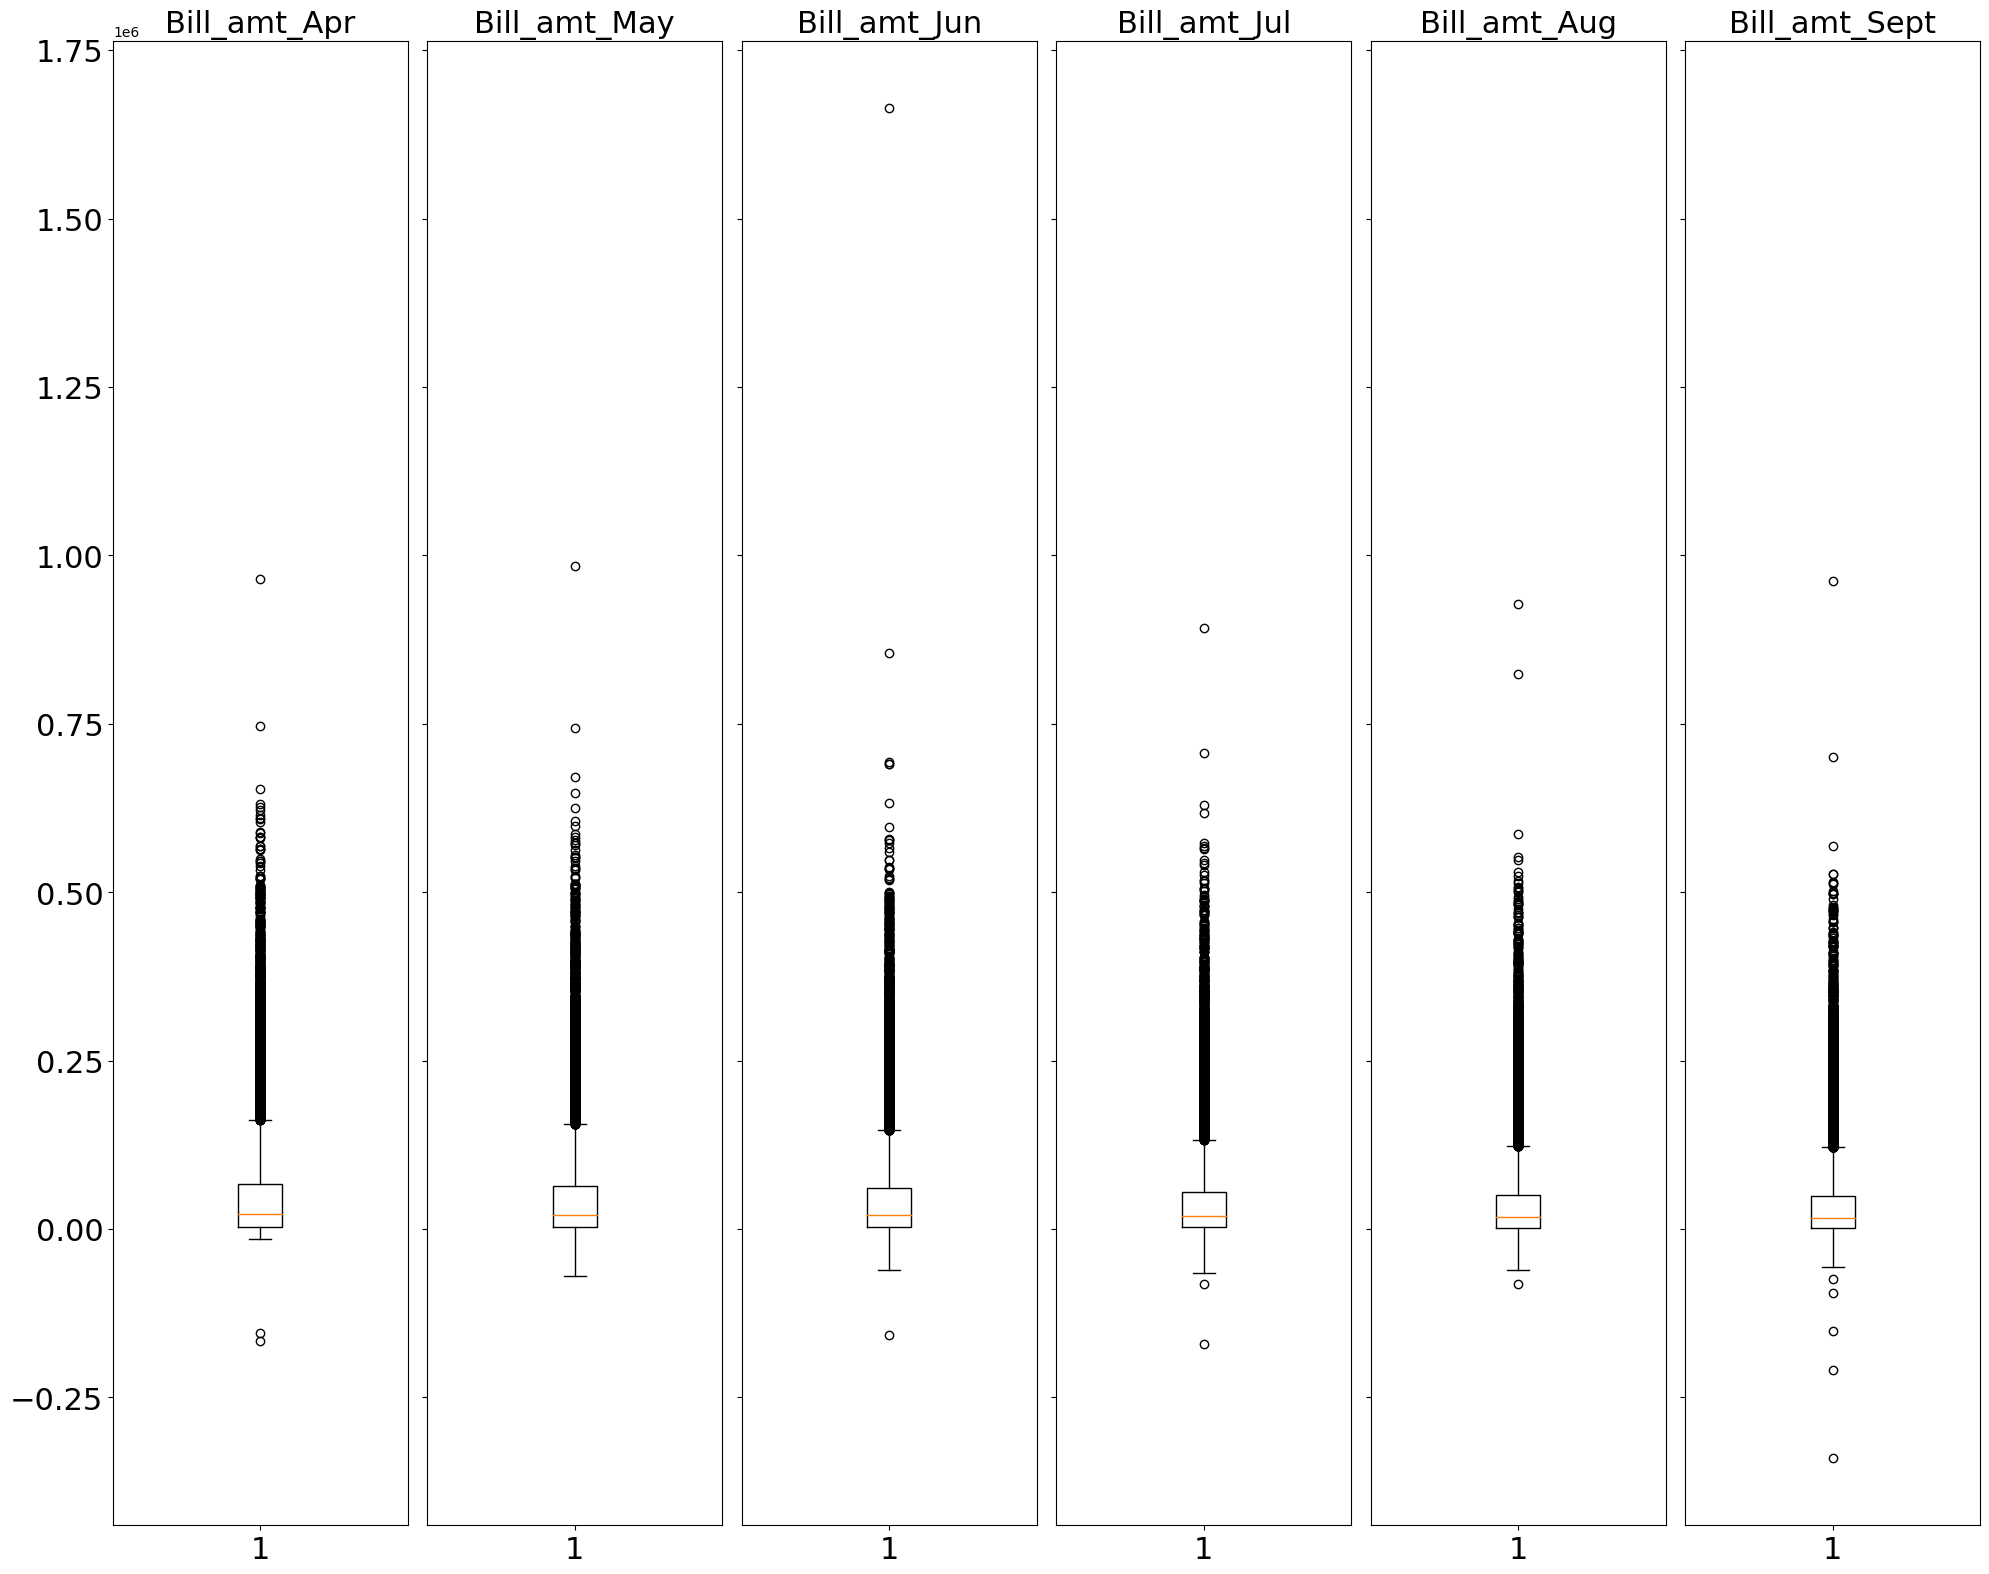

In [8]:
# Select the variables you want to plot

bill_cols_to_plot = ['Bill_amt_Apr', 'Bill_amt_May', 'Bill_amt_Jun','Bill_amt_Jul', 'Bill_amt_Aug', 'Bill_amt_Sept']
########paid_cols_to_plot = clean_df[['Paid_amt_Apr','Paid_amt_May', 'Paid_amt_Jun', 'Paid_amt_Jul', 'Paid_amt_Aug','Paid_amt_Sept']]
######## Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(bill_cols_to_plot), figsize=(20, 16), sharey=True)

####### Create a boxplot for each variable in a separate subplot
for i, col in enumerate(bill_cols_to_plot):
    axes[i].boxplot(clean_df[col])
    axes[i].set_title(col, fontsize=22)
    axes[i].tick_params(axis='both', which='major', labelsize=22)

# Adjust spacing between subplots
plt.tight_layout()
# save te figure
plt.savefig("images/Outliers_1")
# Show the figure
plt.show()


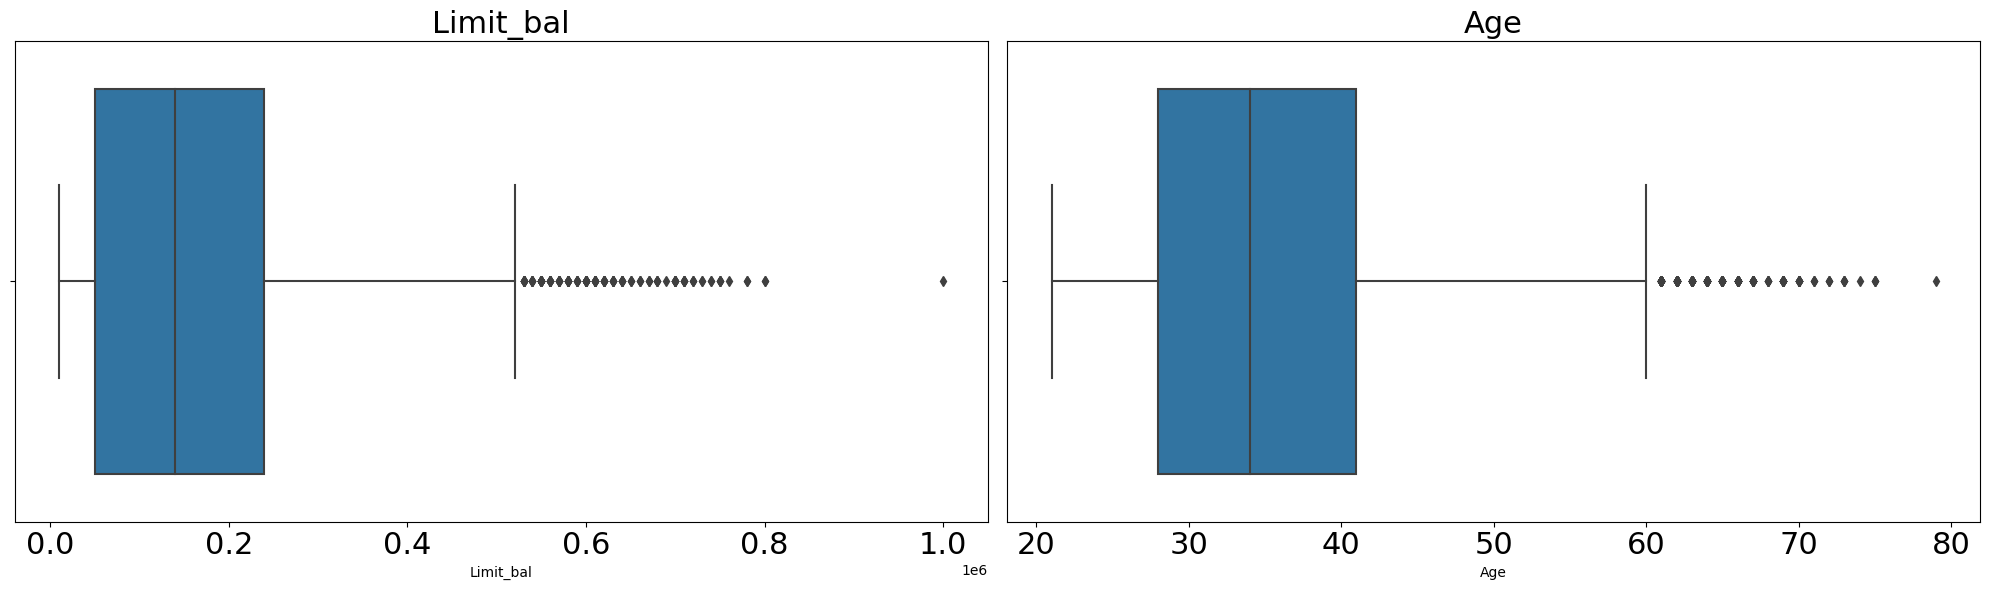

In [9]:


# Select the variables you want to plot
cols_to_plot = ['Limit_bal', 'Age']

# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(20, 6), sharey=True)

# Create a boxplot for each variable in a separate subplot
for i, col in enumerate(cols_to_plot):
    sns.boxplot(x=clean_df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=22)
    axes[i].tick_params(axis='both', which='major', labelsize=22)

# Adjust spacing between subplots
plt.tight_layout()
# save te figure
plt.savefig("images/Outliers_2")
# Show plot
plt.show()


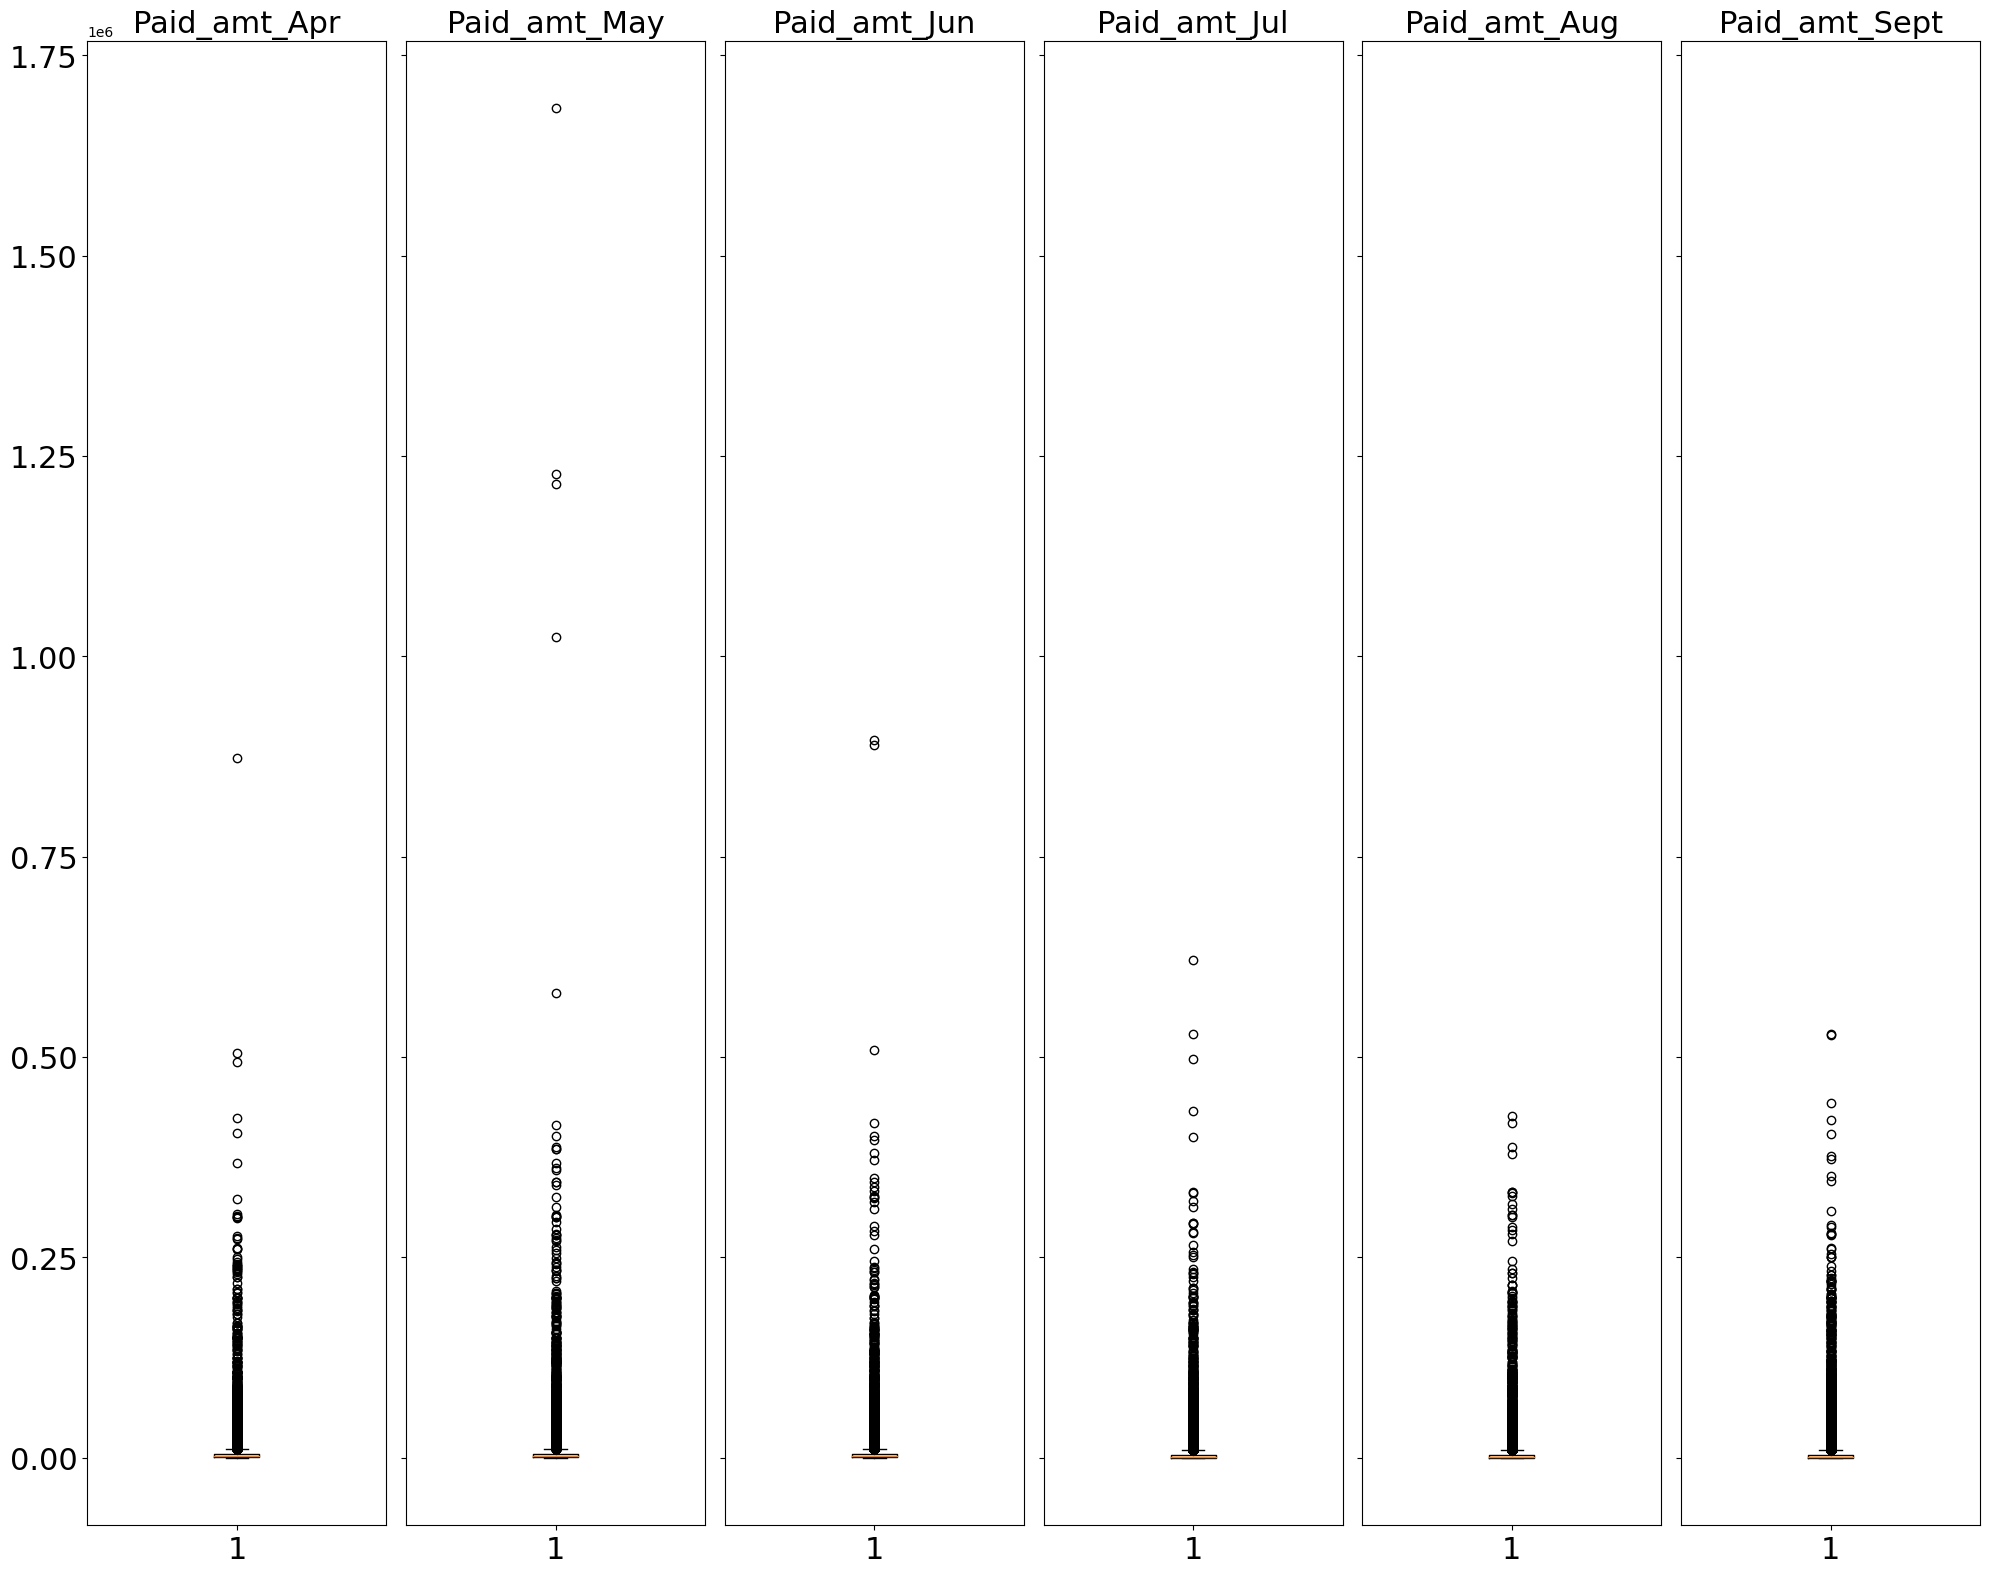

In [10]:
# Select the variables you want to plot
paid_cols_to_plot = clean_df[['Paid_amt_Apr','Paid_amt_May', 'Paid_amt_Jun', 'Paid_amt_Jul', 'Paid_amt_Aug','Paid_amt_Sept']]
# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(bill_cols_to_plot), figsize=(20, 16), sharey=True)

# Create a boxplot for each variable in a separate subplot
for i, col in enumerate(paid_cols_to_plot):
    axes[i].boxplot(clean_df[col])
    axes[i].set_title(col, fontsize=22)
    axes[i].tick_params(axis='both', which='major', labelsize=22)

# Adjust spacing between subplots
plt.tight_layout()
# save the figure
plt.savefig("images/Outliers_3")
# Show the figure
plt.show()

From the graphs we observe that the data is filled with outliers, but considering that they represent different clients, it provides a diversity that will be an effective representations of the whole population. We will instead normalize and standardize the data to have them in a normal distribution.

Histogram plots can be used to visualize the distribution of each variable in the dataset. Histograms provide insights into the data's frequency distribution, central tendency, and spread.

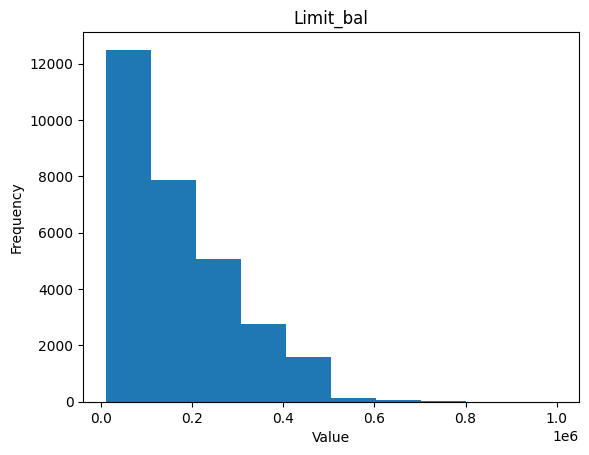

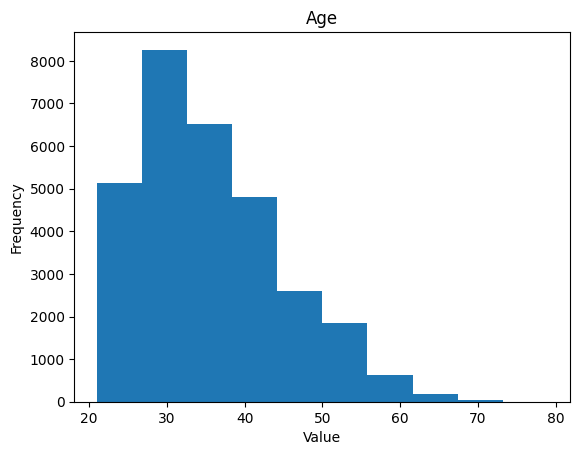

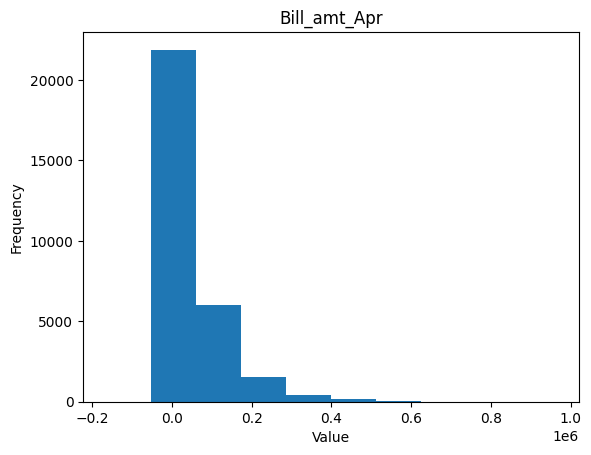

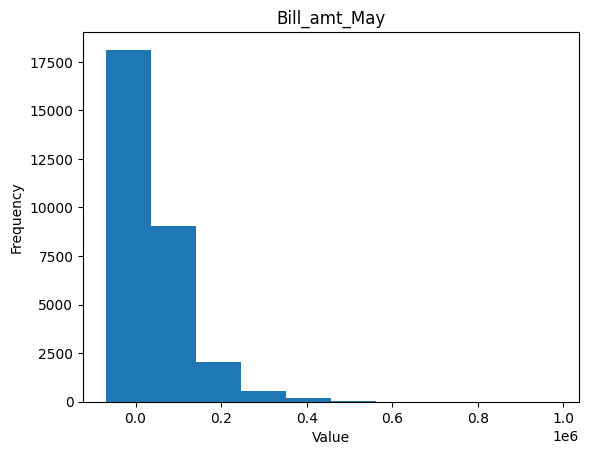

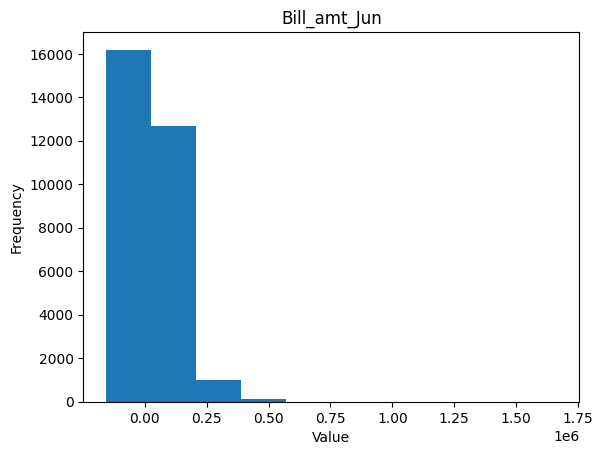

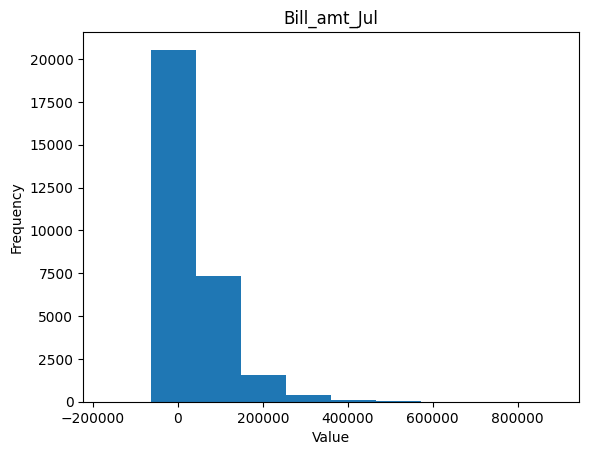

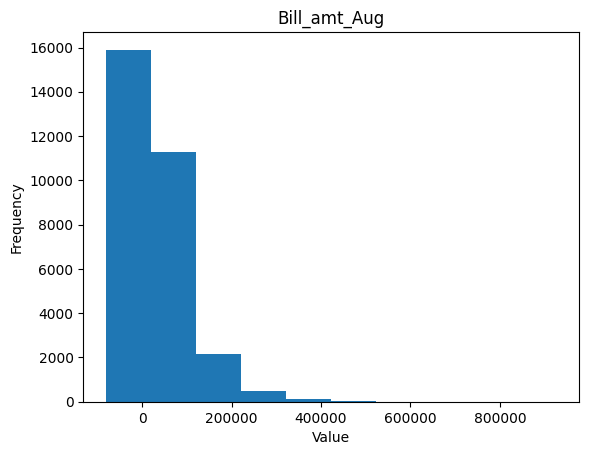

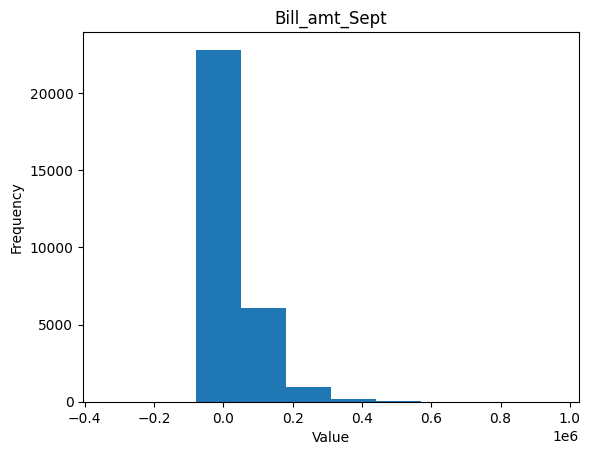

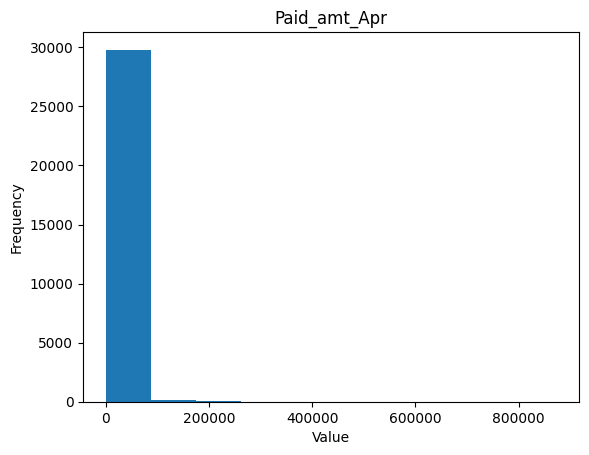

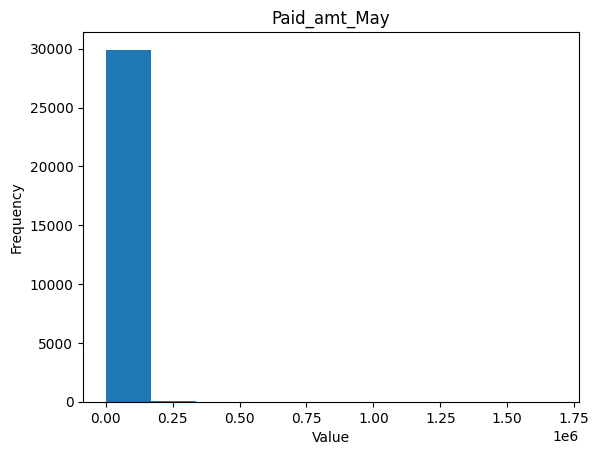

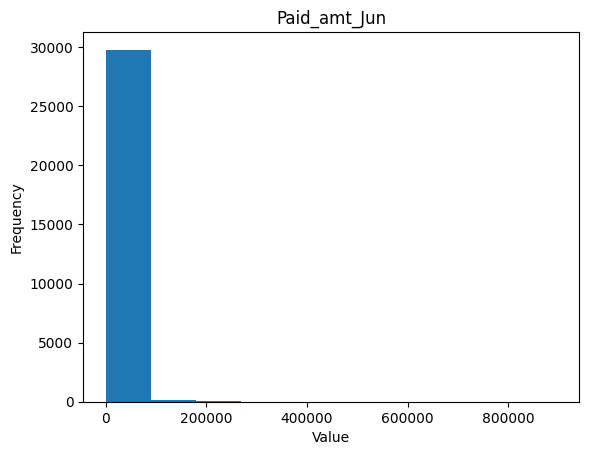

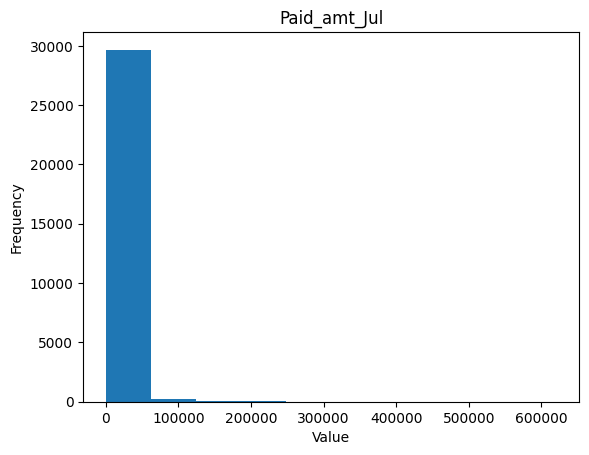

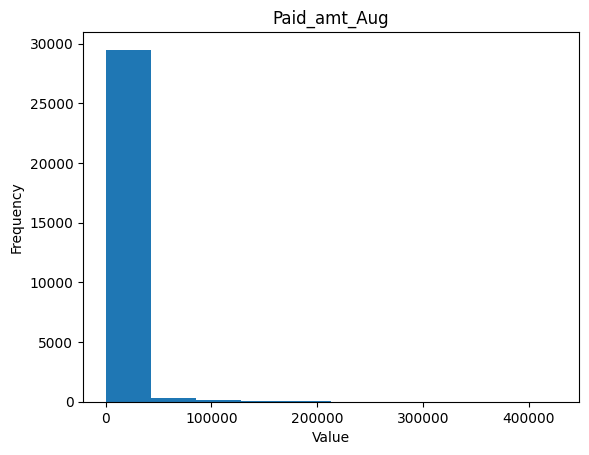

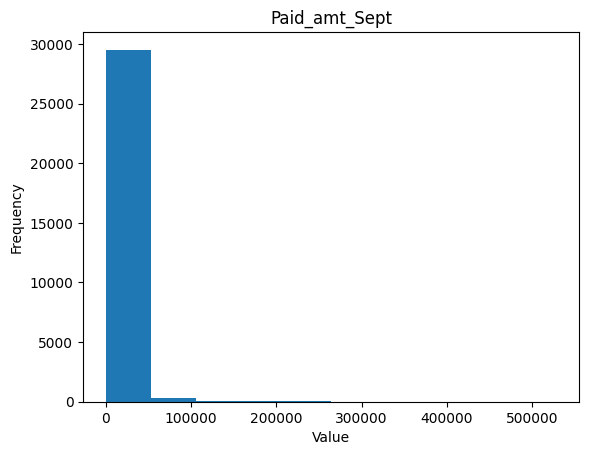

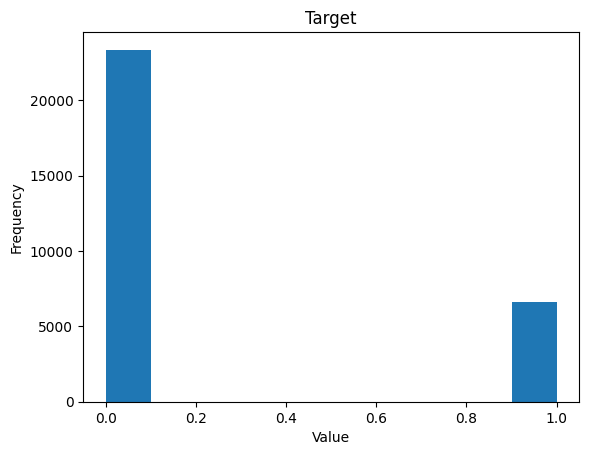

In [11]:
# Histogram plots for each data
# Select the numerical variables you want to plot
num_cols_to_plot = clean_df.select_dtypes(include=['int64']).columns.drop([])

# Create a histogram for each variable
for col in num_cols_to_plot:
    plt.hist(clean_df[col])
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.savefig(f'images/Histogram_{col}.png')
    plt.show()


In [12]:
# We want to Group price into three categories 
# Define the percentile values for each category
limit = clean_df['Limit_bal']
high_percentile = np.percentile(limit, 75)
low_percentile = np.percentile(limit, 25)

# Group the prices into categories based on the percentiles
high_limit = limit[limit > high_percentile]
medium_limit = limit[(limit >= low_percentile) & (limit <= high_percentile)]
low_limit = limit[limit < low_percentile]

print("Highest limit:", high_limit.max())
print("Median limit:", medium_limit.median())
print("Lowest limit:", low_limit.min())


Highest limit: 1000000
Median limit: 120000.0
Lowest limit: 10000


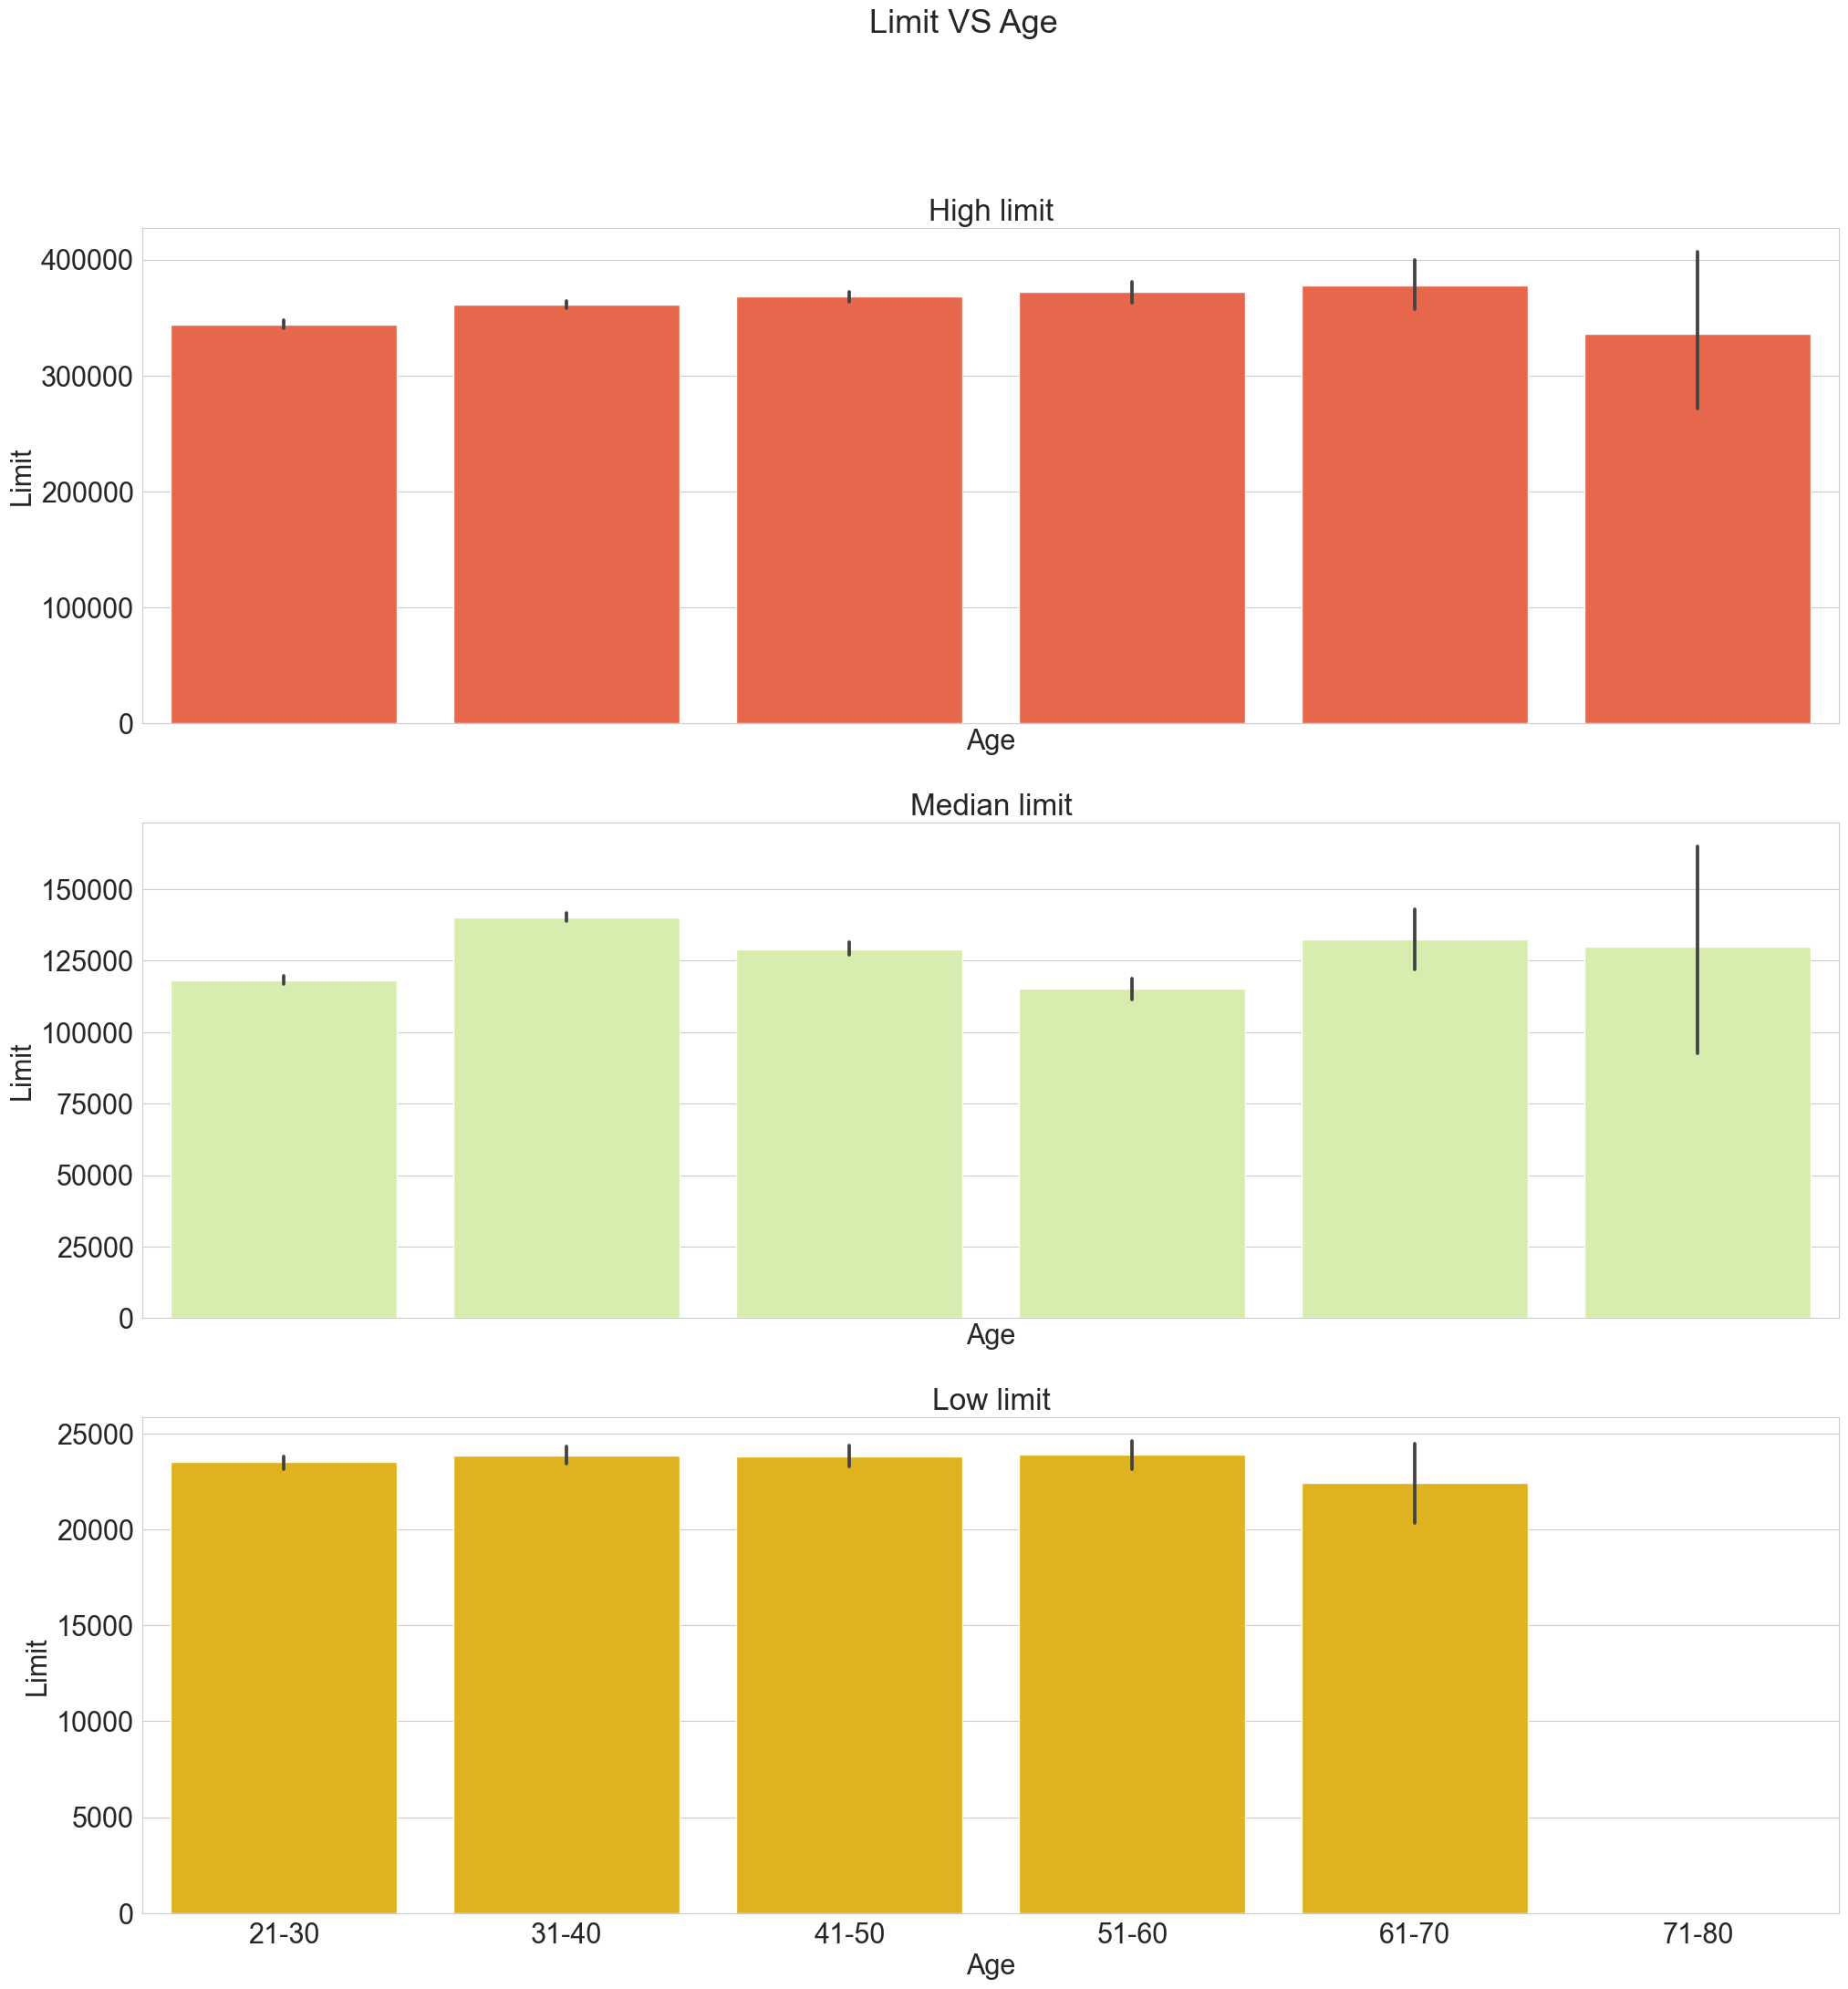

In [13]:

x = clean_df['Age_bin']
y1 = high_limit.sort_values(ascending=False)
y2 = medium_limit.sort_values(ascending=False)
y3 = low_limit.sort_values(ascending=False)

# set plot style
sns.set_style("whitegrid")

# set colors
colors = ["#FFC300", "#DAF7A6", "#FF5733"]

# create figure
fig, ax = plt.subplots(nrows=3, figsize=(24,24), sharex=True, sharey=False)

# bar plot
sns.barplot(x=x, y=y1, color=colors[2], ax=ax[0])
ax[0].set_title("High limit", fontsize=24)
ax[0].set_xlabel("Age", fontsize=22)
ax[0].set_ylabel("Limit", fontsize=22)
ax[0].tick_params(axis='both', which='major',labelsize=22)

# bar plot
sns.barplot(x=x, y=y2, color=colors[1], ax=ax[1])
ax[1].set_title("Median limit", fontsize=24)
ax[1].set_xlabel("Age", fontsize=22)
ax[1].set_ylabel("Limit", fontsize=22)
ax[1].tick_params(axis='both', which='major',labelsize=22)

# bar plot
sns.barplot(x=x, y=y3, color=colors[0], ax=ax[2])
ax[2].set_title("Low limit", fontsize=24)
ax[2].set_xlabel("Age", fontsize=22)
ax[2].set_ylabel("Limit", fontsize=22)
ax[2].tick_params(axis='both', which='major',labelsize=22)

# set title for the whole figure
fig.suptitle("Limit VS Age", fontsize=26)

# adjust spacing
# fig.tight_layout()
# save the plot to file
plt.savefig('Images/Limit Vs Age.png');

# show plot
plt.show()


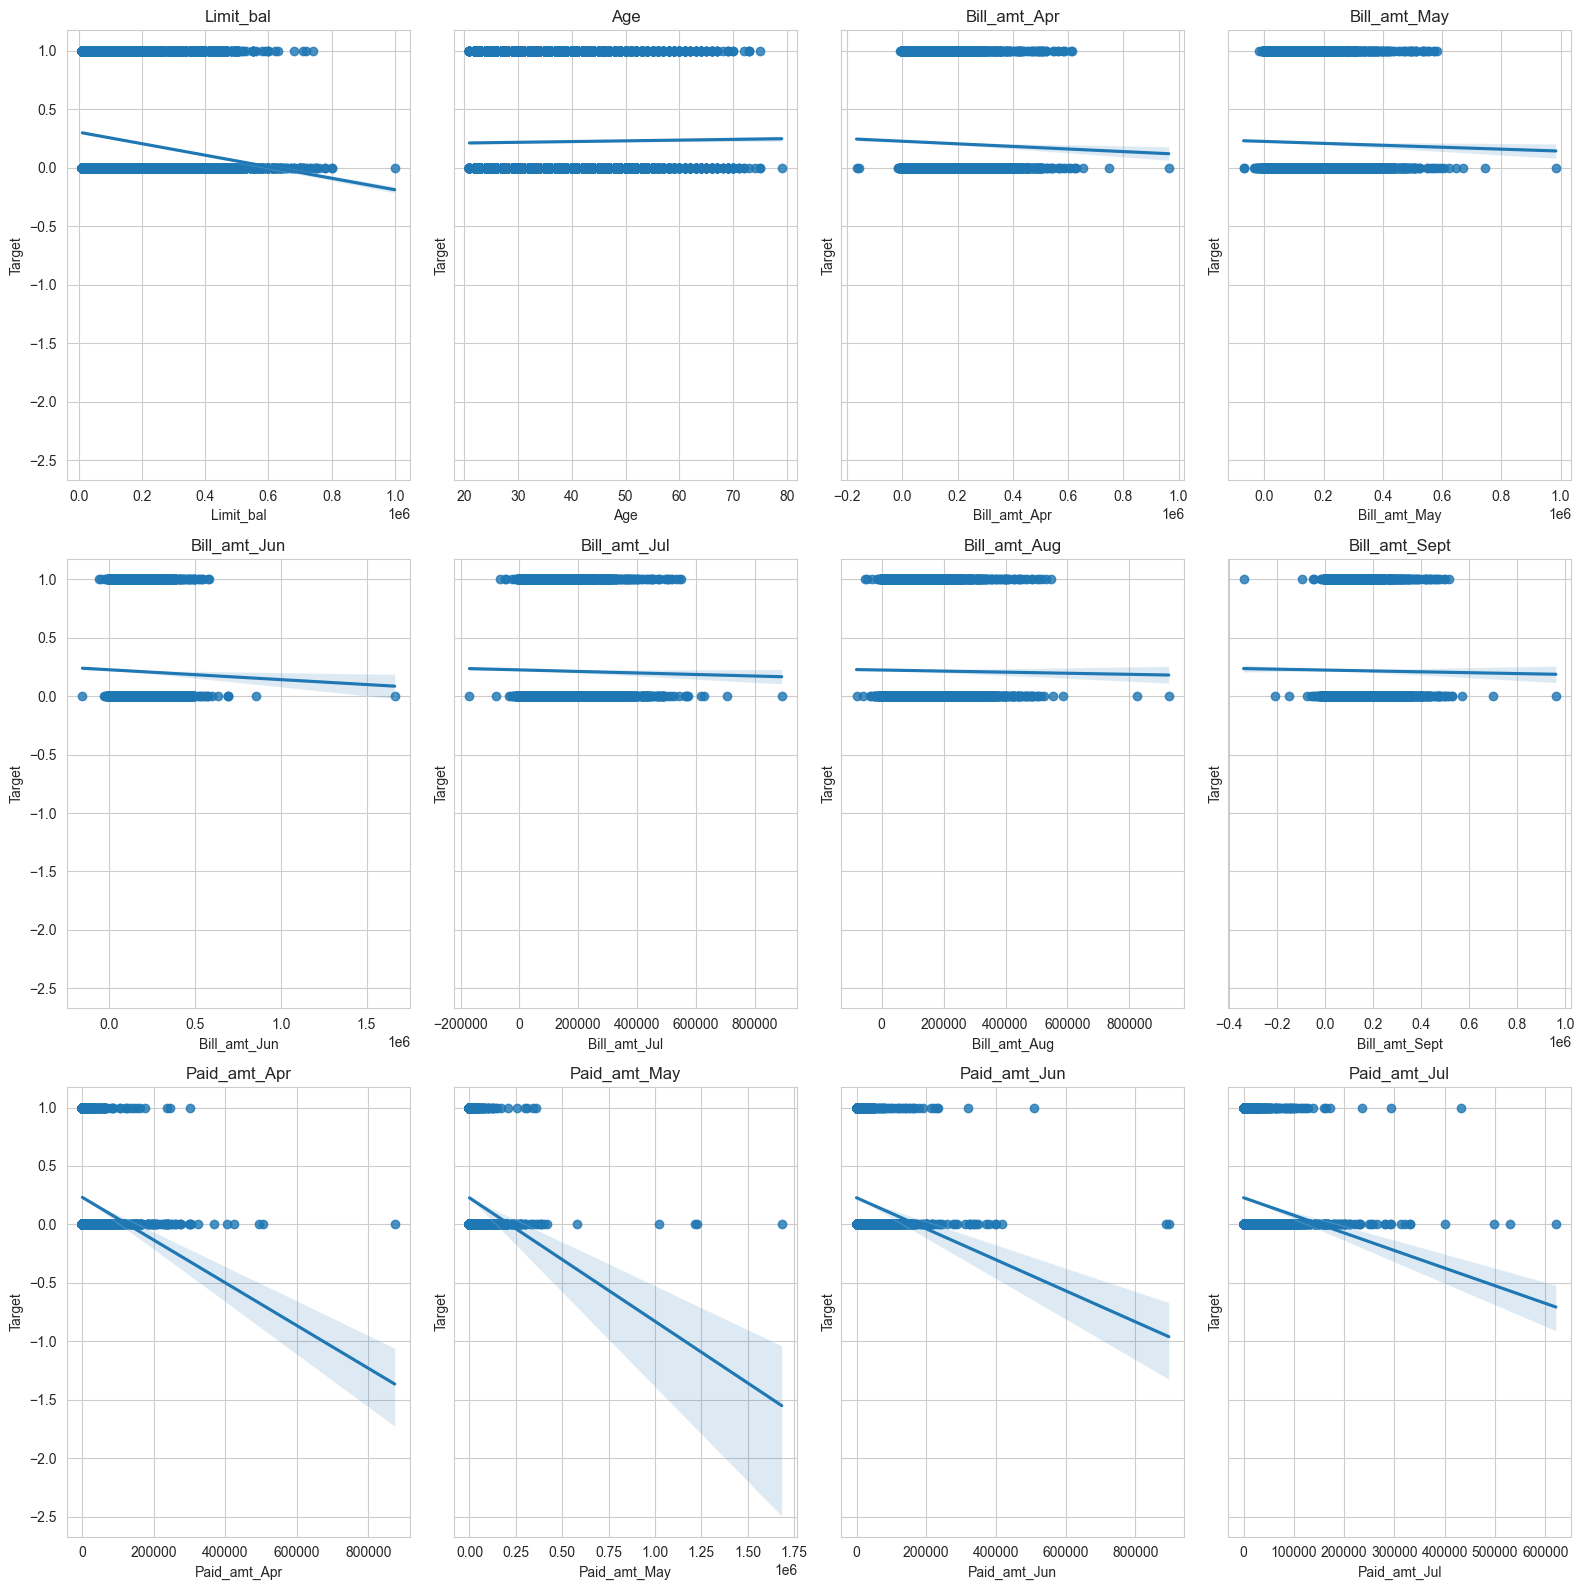

In [14]:
X = clean_df.drop(columns=['Sex', 'Education', 'Marriage', 'Pay_status_Apr',
                            'Pay_status_May', 'Pay_Status_Jun', 'Pay_Status_Jul',
                            'Pay_Status_Aug', 'Pay_Status_Sept'])
fig, axs = plt.subplots(3, 4, figsize=(16, 16), sharey=True)
for i in range(3):
    for j in range(4):
        if i*4 + j < len(X.columns):
            sns.regplot(x=X.iloc[:,i*4+j], y='Target', data=clean_df, ax=axs[i][j])
            axs[i][j].set_title(X.columns[i*4+j])
plt.tight_layout()
plt.show()

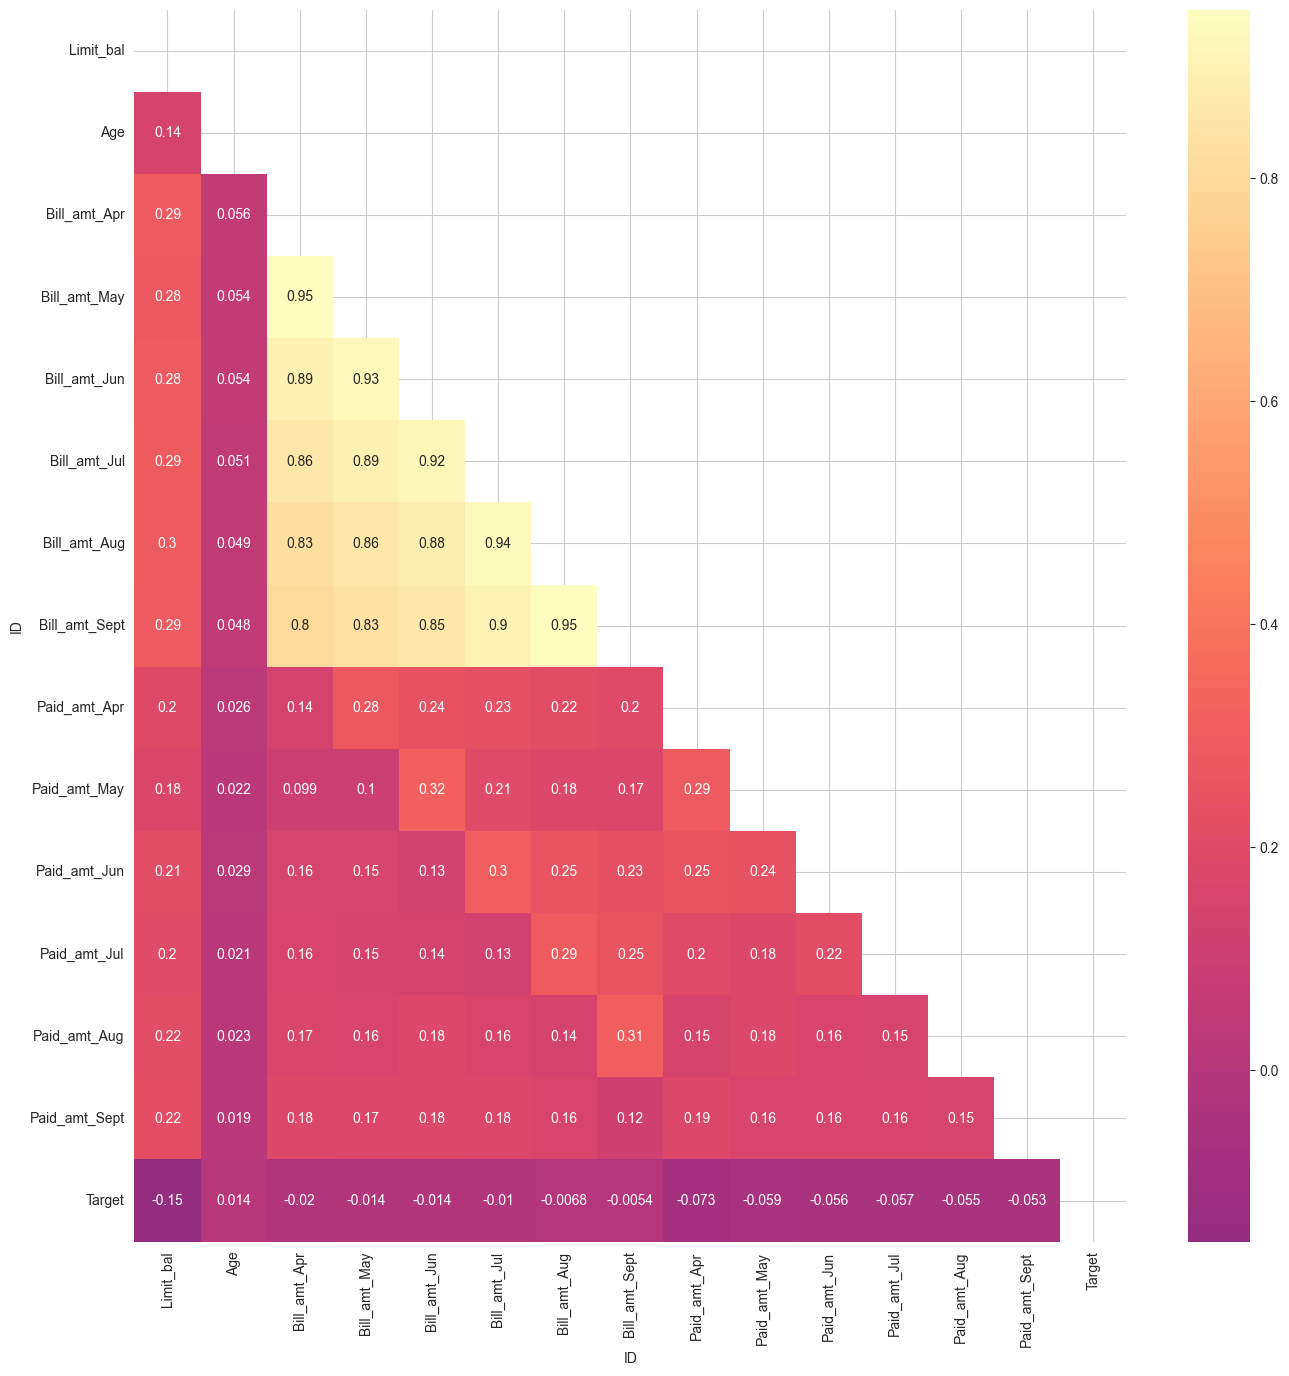

In [15]:
## Multicollinearity
data_corr = clean_df.drop(columns=['Sex', 'Education', 'Marriage', 'Pay_status_Apr',
                            'Pay_status_May', 'Pay_Status_Jun', 'Pay_Status_Jul',
                            'Pay_Status_Aug', 'Pay_Status_Sept', 'Age_bin'])
# Create a correlation matrix
corr_matrix = data_corr.corr()
# Create a fig size
plt.figure(figsize=(16, 16))
# Create a mask to show only the lower triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Plot the heatmap with the lower triangle mask applied
sns.heatmap(corr_matrix, mask=mask, cmap='magma', center=0, annot=True)

# Save figure
plt.savefig('Images/multicollinearity.png');

# Show the plot
plt.show();

## We are drawing only the lower half of the triangle because the matrix is symmetrical, and also to help in reducing redundancy and make it easier to read the matrix. It also saves space, especially when dealing with a large number of variables, and can help to identify patterns or relationships among the variables more quickly



In [16]:
# Looking at correlations between other variables and price
data_corr.corr()["Target"]

ID
Limit_bal       -0.153520
Age              0.013890
Bill_amt_Apr    -0.019644
Bill_amt_May    -0.014193
Bill_amt_Jun    -0.014076
Bill_amt_Jul    -0.010156
Bill_amt_Aug    -0.006760
Bill_amt_Sept   -0.005372
Paid_amt_Apr    -0.072929
Paid_amt_May    -0.058579
Paid_amt_Jun    -0.056250
Paid_amt_Jul    -0.056827
Paid_amt_Aug    -0.055124
Paid_amt_Sept   -0.053183
Target           1.000000
Name: Target, dtype: float64

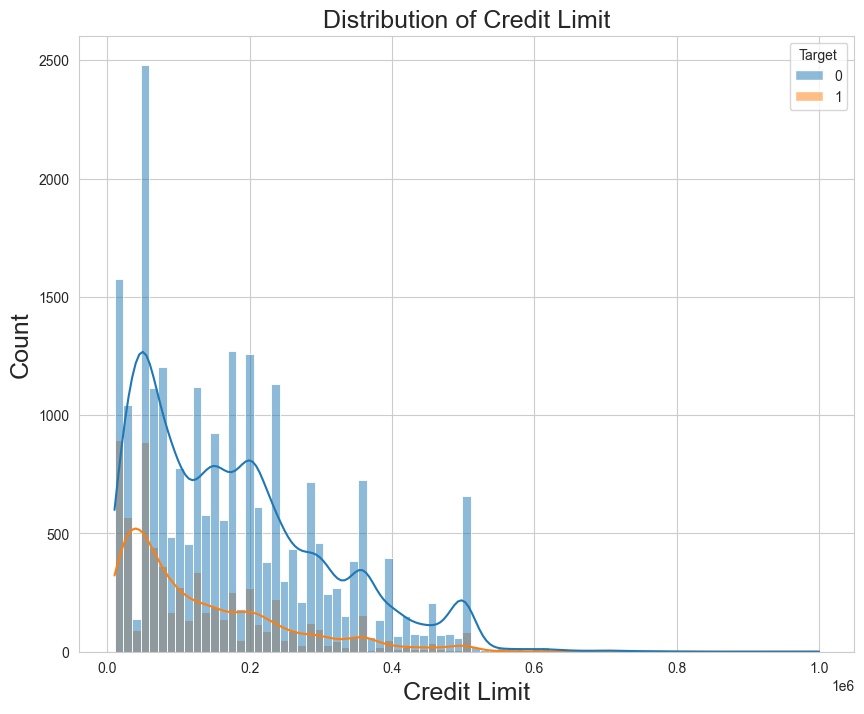

In [17]:
# We will now take a keen look at the distribution of credit limit
# We observed it as the feature with the highest correlation
plt.figure(figsize=(10, 8))
sns.histplot(data=clean_df, x='Limit_bal', hue=clean_df.Target, kde=True)
plt.title('Distribution of Credit Limit', fontsize=18)
plt.xlabel('Credit Limit', fontsize=18)
plt.ylabel('Count', fontsize=18)

# Save the figure to file
plt.savefig('Images/Credit Limit Vs Default')

# Show the figure
plt.show()

## Modelling

Since our target variable can only have one of two possibilities normal linear regression will not be possible, we will therefore use Logistic regression 
we will begin by separating our data into the target colum and our predictor variables. 
Next we will transform the non-numeric to dummy variables which is the standard way for transforming categorical variables for modelling. 

In [18]:
# Preview of dataset for reference
clean_df.head(100)

ID,Limit_bal,Sex,Education,Marriage,Age,Pay_status_Apr,Pay_status_May,Pay_Status_Jun,Pay_Status_Jul,Pay_Status_Aug,...,Bill_amt_Aug,Bill_amt_Sept,Paid_amt_Apr,Paid_amt_May,Paid_amt_Jun,Paid_amt_Jul,Paid_amt_Aug,Paid_amt_Sept,Target,Age_bin
1,20000,Female,University,Married,24,Watch,Watch,Performing,Performing,Defaulter,...,0,0,0,689,0,0,0,0,1,21-30
2,120000,Female,University,Single,26,Performing,Watch,Performing,Performing,Performing,...,3455,3261,0,1000,1000,1000,0,2000,1,21-30
3,90000,Female,University,Single,34,Performing,Performing,Performing,Performing,Performing,...,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
4,50000,Female,University,Married,37,Performing,Performing,Performing,Performing,Performing,...,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
5,50000,Male,University,Married,57,Performing,Performing,Performing,Performing,Performing,...,19146,19131,2000,36681,10000,9000,689,679,0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,90000,Male,University,Single,35,Performing,Performing,Performing,Performing,Performing,...,30942,30835,3621,3597,1179,1112,1104,1143,0,31-40
97,360000,Male,Graduate School,Married,43,Performing,Performing,Performing,Performing,Performing,...,26370,9956,8339,3394,12902,27000,0,68978,0,41-50
98,150000,Male,Graduate School,Single,27,Performing,Performing,Performing,Performing,Performing,...,87725,40788,4031,10006,3266,4040,1698,800,0,21-30
99,50000,Female,High School,Married,22,Performing,Performing,Performing,Performing,Performing,...,8866,7899,1411,1194,379,281,321,197,0,21-30


In [19]:
# Applying Dummy Variables
columns_to_encode = ['Sex', 'Education', 'Marriage', 'Pay_status_Apr',
                        'Pay_status_May', 'Pay_Status_Jun', 'Pay_Status_Jul',
                        'Pay_Status_Aug', 'Pay_Status_Sept']
data_to_encode = clean_df[columns_to_encode]

encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(data_to_encode)

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

clean_df_encoded = pd.concat([clean_df.drop(columns_to_encode, axis=1), encoded_df], axis=1)
clean_df_encoded


,Limit_bal,Age,Bill_amt_Apr,Bill_amt_May,Bill_amt_Jun,Bill_amt_Jul,Bill_amt_Aug,Bill_amt_Sept,Paid_amt_Apr,Paid_amt_May,...,Pay_Status_Aug_Debt Collection,Pay_Status_Aug_Defaulter,Pay_Status_Aug_Performing,Pay_Status_Aug_Substandard,Pay_Status_Aug_Watch,Pay_Status_Sept_Debt Collection,Pay_Status_Sept_Defaulter,Pay_Status_Sept_Performing,Pay_Status_Sept_Substandard,Pay_Status_Sept_Watch
1,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,120000.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29997,150000.0,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29998,30000.0,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29999,80000.0,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30000,50000.0,46.0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Defining variables
# we will Drop the Target column from X since it will be our y
# we will also drop the column we created for binned ages since we already have the age column
X = clean_df_encoded.drop(["Target", "Age_bin"], axis=1)
y = clean_df_encoded['Target']
# splitting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [21]:
print("Null value in the y_test split is", y_test.isnull().sum())
print()
# Removing the null value
y_test.fillna(method='ffill',inplace=True)
print("Null value in the y_test split is removed", y_test.isnull().sum())

Null value in the y_test split is 1

Null value in the y_test split is removed 0


In [22]:
# Applying data standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

The process of encoding and scaling often creates ` NaN ` values therefore we will need to fill then to avoid errors in our model.
We will use a method called Simple Imputer provided by the Scikit Learn library 

In [23]:
# create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on our data
imputer.fit(X_train_scaled)

# transform the data
X_train_imputed = imputer.transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

Now that our data is split and scaled, we will now begin the actual modelling. we will begin by performing a logistic regression and apply a regularization penalty to reduce the effects of multicollinearity that we observed earlier from our feature variables. 

In [24]:
# Create a Logistic Regression model with Ridge regularization
logreg = LogisticRegression(penalty='l2', solver='liblinear')

# Fit the model to the training data
logreg.fit(X_train_imputed, y_train)


LogisticRegression(solver='liblinear')

In [25]:
# Checking coefficients
print("coefficients are", logreg.coef_)

coefficients are [[-0.38668627  0.08690665 -0.52196842  0.29053118  0.02625881  0.09051055
   0.21232797  0.15066939 -0.32808191 -0.57658743 -0.13150695 -0.12238357
  -0.09112687 -0.04264399 -0.01613324  0.01613324 -0.00229111 -0.00981766
  -0.01507149  0.01324856 -0.00200568  0.0179203  -0.00203702  0.00740033
  -0.01368225 -0.00647898 -0.00102551  0.01652172  0.00090839 -0.01148915
   0.01054547  0.01160446 -0.00472857  0.03604248 -0.01108495  0.00448897
   0.01577129 -0.00102529 -0.073163   -0.00524667  0.01357062 -0.02552126
   0.00194353  0.0370217   0.00617293 -0.01255628  0.03055081 -0.00065416
  -0.01892922 -0.01216609  0.01024116 -0.0115272   0.00439804]]


In [26]:
# Create predictions from our model
y_pred1 = logreg.predict(X_test_imputed)
print("Prediction Value Counts")
pred_unique_values, counts = np.unique(y_pred1, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values, counts)]:
    print(f"{value}: {count}")
print("Actual Value Counts")
act_unique_values, counts = np.unique(y_test, return_counts=True)
for value, count in list(zip(act_unique_values, counts)):
    print(f"{value}: {count}")


Prediction Value Counts
0.0: 8999
1.0: 2
Actual Value Counts
0.0: 7054
1.0: 1947


Without much analysis we observe that the model performed very poorly just by the count. Below is a confusion matrix showing the predictions.  We will still perform calculations to determine the accuracy.

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)

print("Confusion Matrix")
print(cm)
print("Matrix intepretation")
print(
"""[[TN  FP]"""
"""[FN  TP]]"""
)

Confusion Matrix
[[7053    1]
 [1946    1]]
Matrix intepretation
[[TN  FP][FN  TP]]


The matrix above can be interpreted as:

>> TN: True Negatives (correctly predicted negatives): 7053 

>> FP: False Positives (incorrectly predicted positives): 1

>> FN: False Negatives (incorrectly predicted negatives): 1946

>> TP: True Positives (correctly predicted positives): 1


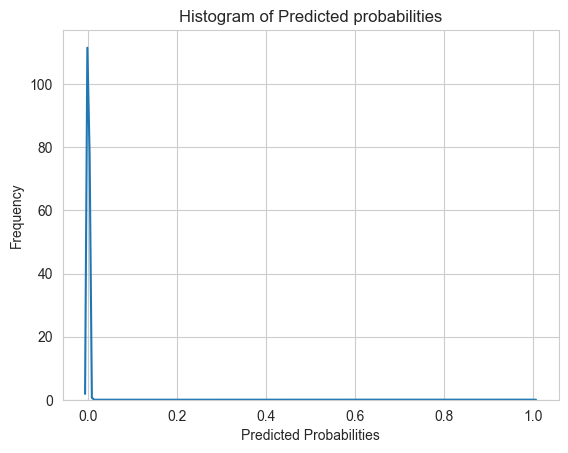

In [48]:
# Create a histogram of predicted probabilities 
sns.kdeplot(y_pred1)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted probabilities")
plt.savefig("Images/Baseline Predictions")
plt.show()


Below we will create a function (`ClassificationEvaluator`) to evaluate the model that we can re use for future subsequent models.

In [29]:
# Evaluate All metrics 
evaluator = ClassificationEvaluator(y_test, y_pred1)
metrics = evaluator.evaluate()

# print the metrics
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Accuracy: 0.7836907010332186
Precision: 0.5
Recall: 0.0005136106831022085
F1-Score: 0.0010261672652642382
ROC AUC: 0.5001859235723423


> The Accuracy is the proportion of correctly classified instances of the total number of instances. Our current score show only 78.37% of the instances were classified correctly. 

> Precision shows the proportion of true positive predictions out of the total. in our case only 50% were true positives. 

> We observe a very low Recall score of 0.05% indicating the model only identified a small fraction of actual positive instances. 

> F1-Score shows the overall performance combining both recall and precision. With a score of 0.001 indicates poor performance as we deduced earlier. 

> The last metric, ROC AUC(Receiver Operating, Characteristic Area Under Curve) measures the models ability to distinguish between positive and negative instances. With a score of close to 0.5, indicates the model has poor discriminatory power.

Overall, the results suggest that the model's performance is subpar. It has low recall, indicating that it fails to identify a significant portion of positive instances. The precision is also low, suggesting a high rate of false positives. The F1-score and ROC AUC further confirm the poor performance of the model. Further analysis and improvement of the model may be necessary to achieve better results.

We will investigate the impact of class imbalance in our target variable, and based on the findings we will perform Oversampling of the minority class or undersampling of the majority class. 
We will also employ cross validation to obtain more reliable estimates of the models performance to reduce overfitting.
We should also do a log transformation of the data to ensure the data is normally distributed.

### Class Imbalance Investigation
We will create a pie chart of the values in the `Target` column below. 

Class distribution is Target
0    23364
1     6636
Name: count, dtype: int64


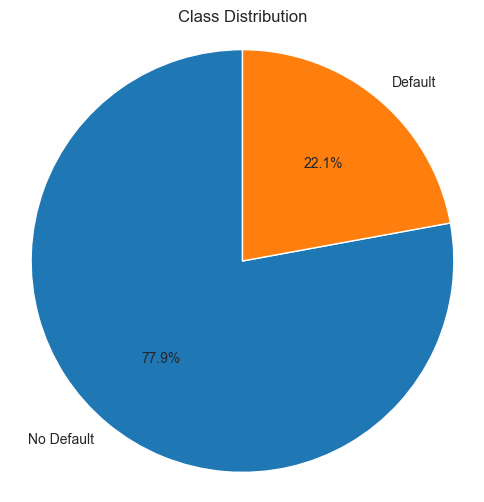

In [30]:
# Calculate the count of each class in the target column
class_count = clean_df['Target'].value_counts()
print("Class distribution is", class_count)
class_labels = ['No Default', 'Default']
# Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(class_count, labels=class_labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Class Distribution')
plt.savefig("Images/Class distribution")
plt.show()

Assessing the severity of class imbalance to determine if it requires addressing. 

In [31]:
# calculate imbalance ratio
imbalance_ratio = class_count[0] / class_count[1]


# Asses the severity
if imbalance_ratio > 5:
    severity = "severe and requires addressing"
elif imbalance_ratio > 1:
    severity = "moderate and may require addressing"
else:
    severity = "not significant"


# Print the ratio
print(f"The class imbalance is {severity}.  \
        Class Imbalance Ratio: {imbalance_ratio: .2f}")


The class imbalance is moderate and may require addressing.          Class Imbalance Ratio:  3.52


In [32]:
# Create the combined sampling pipeline
sampling_pipeline = make_pipeline(
    RandomUnderSampler(random_state=42),
    SMOTE(random_state=42)
)

# Apply the combined sampling pipeline
X_resampled, y_resampled = sampling_pipeline.fit_resample(X_train_imputed,y_train)

In [33]:
# calculate imbalance ratio
class_count1 = y_resampled.value_counts()
print("Class distribution is", class_count1)

imbalance_ratio2 = class_count1[0] / class_count1[1]

print()
# Asses the severity
if imbalance_ratio2 > 5:
    severity = "severe and requires addressing"
elif imbalance_ratio2 > 1:
    severity = "moderate and may require addressing"
else:
    severity = "not significant"


# Print the ratio
print(f"The class imbalance is {severity}.                                  \
        Class Imbalance Ratio: {imbalance_ratio2: .2f}")

Class distribution is Target
0.0    4689
1.0    4689
Name: count, dtype: int64

The class imbalance is not significant.                                          Class Imbalance Ratio:  1.00


We now observe that our y_train is no longer imbalanced, although this does not necessarily mean the model will perform better.
Below we will attempt to build our second model that will use the newly transformed data, and we will also employ cross validation measures. Specifically, K-fold cross validation with 5 folds. We will also use the same parameters we used before.

In [34]:
# Define classifier model
classifier = LogisticRegression(penalty='l2', solver='liblinear')

# Perform K-fold validation with 5 folds
k=5
cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=k, scoring='accuracy')

# print the performance metrics for each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} accuracy: {score}")
    
# calculate and print the average performance across all folds
avg_score = np.mean(cv_scores)
print(f"Average accuracy: {avg_score}")

Fold 1 accuracy: 0.605543710021322
Fold 2 accuracy: 0.5842217484008528
Fold 3 accuracy: 0.6087420042643923
Fold 4 accuracy: 0.6165333333333334
Fold 5 accuracy: 0.6090666666666666
Average accuracy: 0.6048214925373134


We observe the best performing model had an accuracy of 61.7%, while the average was 60.5%.
Lets now make out predictions below and assign them to y_pred2

In [35]:
# Fit the logistic regression model with training data
classifier.fit(X_resampled, y_resampled)

# Make predictions
y_pred2 = classifier.predict(X_test_imputed)

# Checking values
print("Prediction Value Counts")
pred_unique_values2, counts = np.unique(y_pred2, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values2, counts)]:
    print(f"{value}: {count}")
print()
# Comparing with original
print("Actual Value Counts")
act_unique_values, counts = np.unique(y_test, return_counts=True)
for value, count in list(zip(act_unique_values, counts)):
    print(f"{value}: {count}")
print()
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred2)

print("Confusion Matrix")
print(cm)
print()
print("[[TN  FP]")
print("[FN  TP]]")

Prediction Value Counts
0.0: 4144
1.0: 4857

Actual Value Counts
0.0: 7054
1.0: 1947

Confusion Matrix
[[3567 3487]
 [ 577 1370]]

[[TN  FP]
[FN  TP]]


We wil now get performance metrics for our new model

In [36]:
F1_Score1 = f1_score(y_test, y_pred1)
F1_Score2 = f1_score(y_test, y_pred2)

print("The baseline model F1-Score is:", F1_Score1)
print("The classifier model F1-Score is:", F1_Score2)
print()
print("The classifier model has shown substantial improvement in \
        predicting the positive class compared to the baseline model. ")

The baseline model F1-Score is: 0.0010261672652642382
The classifier model F1-Score is: 0.40270429159318044

The classifier model has shown substantial improvement in         predicting the positive class compared to the baseline model. 


In [44]:
evaluator1 = ClassificationEvaluator(y_test, y_pred1)
ROC_AUC1 = evaluator1.roc_auc()

evaluator2 = ClassificationEvaluator(y_test, y_pred2)
ROC_AUC2 = evaluator2.roc_auc()

print("The baseline model roc_auc is:", ROC_AUC1)
print("The classifier model roc_auc is:", ROC_AUC2)
print()
print(
    "The classifier model has a higher ROC AUC score compared to the baseline model,\
    indicating that it performs better in distinguishing between the positive and negative classes."
)

The baseline model roc_auc is: 0.5001859235723423
The classifier model roc_auc is: 0.6046585886933711

the classifier model has a higher ROC AUC score compared to the baseline model,    indicating that it performs better in distinguishing between the positive and negative classes.


The Model does improve in performance, but it is not near the score we would want to use as a determiner for policy changes. 
We will now try and log transform our data to see if it would have an improvement. 
We will do the transformations to the columns

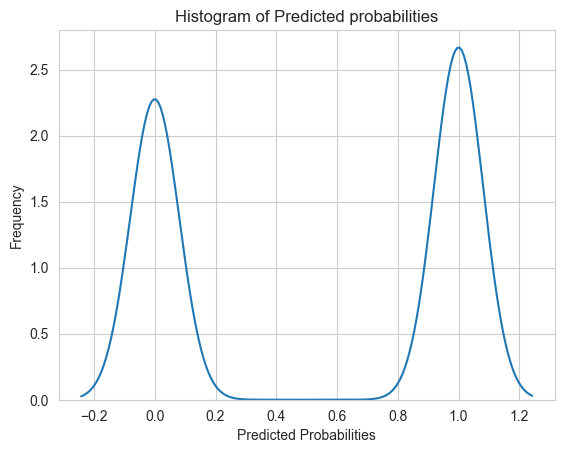

In [47]:
# Create a histogram of predicted probabilities 
sns.kdeplot(y_pred2)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted probabilities")
plt.savefig("Images/Classifier predictions")
plt.show()

We observe that the predictions moved from a left skewed shape to a bimodal shape. we can attempt to repeat the above models but instead of applying ridge regression, we use lasso regression and observe how it will perform.

In [ ]:
# Function to plot bar charts showing Payment Status against Limit balance
# takes in data and the columns to be plotted
def plot_bar_charts(data, columns):
    for column in columns:
        x = column
        y = data['Limit_bal']
        title = f"Distribution of {column}"
        xlabel = column.replace('_', ' ').title()
        ylabel = "Count"
        
        plt.figure(figsize=(18,6))
        sns.histplot(x=column, data=data)
        plt.xticks(rotation=90)
        plt.xlabel(xlabel, fontsize=26)
        plt.ylabel(ylabel, fontsize=26)
        plt.title(title, fontsize=26)
        plt.show()

In [ ]:
columns_to_plot = ['Pay_status_May', 'Pay_Status_Jun', 'Pay_Status_Jul', 'Pay_Status_Aug',
                    'Pay_Status_Sept']
plot_bar_charts(data, columns_to_plot)

KeyError: 'Limit_bal'

In [ ]:
data.columns

In [ ]:
data.describe()

We will now look at the values in our target column. Here the entry 0 refers to non default in the coming month, and 1 refers to default.

In [ ]:
data['Default payment next month'].value_counts()

we observe the data only has 6636 clients who default their payments. 